In [1]:
import os
from termcolor import colored
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import pymatreader as pymat
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score

In [2]:
path_str = os.getcwd() + '/'

In [3]:
data_file_name = 'Majazi1.mat'
gt_file_name = 'Majazi1_gt.mat'

In [4]:
data = pymat.read_mat(path_str + data_file_name)['Botswana']
data_gt = pymat.read_mat(path_str + gt_file_name)['Botswana_gt']

In [5]:
print(f"Shape of Data: {data.shape}")
print(f'Shape of labels: {data_gt.shape}')
print(f'Data Type: {data.dtype}')

Shape of Data: (1476, 256, 145)
Shape of labels: (1476, 256)
Data Type: uint16


In [6]:
data_plot = data[:, :, [1, 100, 140]]
data_plot = data_plot.astype(np.uint8)
gt_plot = data_gt.astype(np.uint8)
print(f'{data_plot.dtype}')
print(f'{gt_plot.dtype}')

uint8
uint8


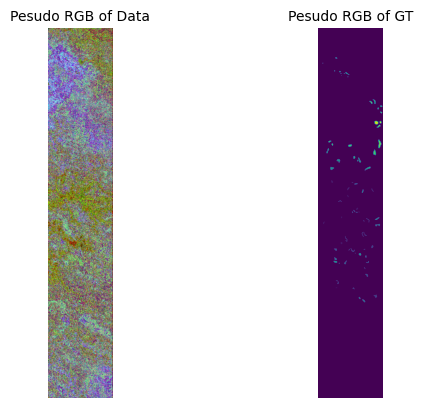

In [7]:
plt.figure(1)
plt.subplot(1, 2, 1), plt.imshow(data_plot), plt.axis('off'), plt.title('Pesudo RGB of Data', fontsize=10)
plt.subplot(1, 2, 2), plt.imshow(gt_plot), plt.axis('off'), plt.title('Pesudo RGB of GT', fontsize=10)
plt.show()

In [8]:
classes = np.unique(data_gt)
print(f'Classes: {classes}')

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [9]:
data_reshaped = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
gt_reshaped = data_gt.flatten()
print(f'Shape of reshaped Data: {data_reshaped.shape}')
print(f'Shape of reshaped GT: {gt_reshaped.shape}')

Shape of reshaped Data: (377856, 145)
Shape of reshaped GT: (377856,)


In [11]:
train_size_list = [0.001]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], \
    data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], \
    data['y_test_' + str(train_size_float)] =\
    train_test_split(data_reshaped, gt_reshaped, train_size=\
                     train_size_float, random_state=0)

In [12]:
train_size = 0.001
X_train, X_test, y_train, y_test = data['X_train_' + str(train_size)], \
data['X_test_' + str(train_size)], data['y_train_' + str(train_size)], data['y_test_' + str(train_size)]
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (377, 145)
Shape of X_test: (377479, 145)
Shape of y_train: (377,)
Shape of y_test: (377479,)


- <a name='1'>${\bf{\text{SVM(RBF)}}}$</a>

In [13]:
scaler = StandardScaler()

In [14]:
train_size_list = [0.001]
data_scaled = {}
standard_scaler = StandardScaler()

for train_size in train_size_list:
    data_scaled['X_train_' + str(train_size)] = standard_scaler.fit_transform(data['X_train_' + str(train_size)])
    data_scaled['X_test_' + str(train_size)] = standard_scaler.fit_transform(data['X_test_' + str(train_size)])
    data_scaled['y_train_' + str(train_size)] = data['y_train_' + str(train_size)]
    data_scaled['y_test_' + str(train_size)] = data['y_test_' + str(train_size)]

- <a name='2'>${\bf{\text{K-fold}}}$</a>

In [15]:
train_size_tuple = (0.001, )
k_fold_tuple = range(2, 16)

parameters_for_k_fold_dict = {'train_size': train_size_tuple, 'k_fold': k_fold_tuple}
total_length = 1
for key_name_str in parameters_for_k_fold_dict.keys():
    total_length *= len(parameters_for_k_fold_dict[key_name_str])
    
    
train_size_stored_values = np.zeros(total_length)
acc_mean_stored_values = np.zeros(total_length)
k_fold_stored_values = np.zeros(total_length)


clf_without_pca = SVC()
count = 0
for train_size in parameters_for_k_fold_dict['train_size']:
    X_train, y_train, X_test, y_test = data_scaled['X_train_' + str(train_size)], data_scaled['y_train_' + str(train_size)], \
    data_scaled['X_test_' + str(train_size)], data_scaled['y_test_' + str(train_size)]
    clf_without_pca.fit(X_train, y_train)
    for k_fold in parameters_for_k_fold_dict['k_fold']:
        count += 1
        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold)
        acc_mean = scores.mean()
        train_size_stored_values[count - 1] = train_size
        acc_mean_stored_values[count - 1] = acc_mean
        k_fold_stored_values[count - 1] = k_fold
        
df_for_k_fold = pd.DataFrame({'Train Size': train_size_stored_values, 'K-fold(CV)': k_fold_stored_values,\
'Mean of Accuracy': acc_mean_stored_values})

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [16]:
df_for_k_fold

,Train Size,K-fold(CV),Mean of Accuracy
0,0.001,2.0,0.986744
1,0.001,3.0,0.986751
2,0.001,4.0,0.986758
3,0.001,5.0,0.986737
4,0.001,6.0,0.986772
5,0.001,7.0,0.986772
6,0.001,8.0,0.986758
7,0.001,9.0,0.986772
8,0.001,10.0,0.986842
9,0.001,11.0,0.986860


In [17]:
df1 = df_for_k_fold[df_for_k_fold['Train Size'] == 0.001]
df1

,Train Size,K-fold(CV),Mean of Accuracy
0,0.001,2.0,0.986744
1,0.001,3.0,0.986751
2,0.001,4.0,0.986758
3,0.001,5.0,0.986737
4,0.001,6.0,0.986772
5,0.001,7.0,0.986772
6,0.001,8.0,0.986758
7,0.001,9.0,0.986772
8,0.001,10.0,0.986842
9,0.001,11.0,0.986860


In [19]:
df1_result = df1[df1['Mean of Accuracy'] == (df1['Mean of Accuracy']).max()]
df1_result

,Train Size,K-fold(CV),Mean of Accuracy
10,0.001,12.0,0.986979


- <a name='3'>${\bf{\text{Optimal K-fold = 12}}}$</a>

- <a name='4'>${\bf{\text{TEST: SVC(rbf)}}}$</a>

In [20]:
svc = SVC(kernel='rbf', random_state=0)

In [21]:
pipe = Pipeline(steps=[("svc", svc)])

In [22]:
param_grid = {'svc__C': np.logspace(-4, 4, 9), \
             'svc__gamma': np.linspace(0, 1, 11)}

In [23]:
input_data_dict = data_scaled

In [24]:
train_size = 0.001
X_train, y_train = input_data_dict['X_train_' + str(train_size)], input_data_dict['y_train_' + str(train_size)]
search = GridSearchCV(pipe, param_grid, cv=12)
search.fit(X_train, y_train)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 1188.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in f

GridSearchCV(cv=12, estimator=Pipeline(steps=[('svc', SVC(random_state=0))]),
             param_grid={'svc__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'svc__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [25]:
best_params = search.best_params_
print(f"\n\u03BB = {best_params['svc__C']}\n\n\u03B3 = {best_params['svc__gamma']}\n")


λ = 0.0001

γ = 0.1



In [26]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {best_score}\n')


Best Accuracy is: 0.9869791666666666



In [27]:
train_size = 0.001
clf = SVC(C=0.0001, kernel='rbf', gamma=0.1)
X_train, y_train, X_test, y_test = input_data_dict['X_train_' + str(train_size)], \
input_data_dict['y_train_' + str(train_size)], input_data_dict['X_test_' + str(train_size)], \
input_data_dict['y_test_' + str(train_size)]
clf.fit(X_train, y_train)

SVC(C=0.0001, gamma=0.1)

In [28]:
y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(0, 15), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [29]:
print(f"\nResult of this Pipeline: {colored('Input_Data', 'blue')} ---> {colored('Standard Scaler', 'magenta')}\
 ---> {colored('SVC(rbf)', 'magenta')}")
print(f'\nOverall Accuracy: {colored(ov_acc, "green")}\n\n\u03BA = {colored(kappa, "green")}\n')


Result of this Pipeline: Input_Data ---> Standard Scaler ---> SVC(rbf)

Overall Accuracy: 0.9914087936017633

κ = 0.0



- <a name='4'>${\bf{\text{TEST: SVC(poly)}}}$</a>

In [30]:
svc = SVC(kernel='poly', random_state=0)

In [31]:
pipe = Pipeline(steps=[("svc", svc)])

In [32]:
param_grid = {'svc__C': np.logspace(-4, 4, 9), 'svc__degree': [2, 3, 4, 5], \
             'svc__gamma': np.linspace(0, 1, 11)}

In [33]:
train_size = 0.001
X_train, y_train = input_data_dict['X_train_' + str(train_size)], input_data_dict['y_train_' + str(train_size)]
search = GridSearchCV(pipe, param_grid, cv=12)
search.fit(X_train, y_train)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 4752.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in f

GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('svc',
                                        SVC(kernel='poly', random_state=0))]),
             param_grid={'svc__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'svc__degree': [2, 3, 4, 5],
                         'svc__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [34]:
best_params = search.best_params_
print(f"\n\u03BB = {best_params['svc__C']}\n\n\u03B3 = {best_params['svc__gamma']}\n\nDegree = \
{best_params['svc__degree']}\n")


λ = 0.0001

γ = 0.1

Degree = 2



In [35]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {colored(best_score, "green")}\n')


Best Accuracy is: 0.9869791666666666



In [36]:
train_size = 0.001
clf = SVC(C=0.0001, kernel='poly', degree=2, gamma=0.1)
X_train, y_train, X_test, y_test = input_data_dict['X_train_' + str(train_size)], \
input_data_dict['y_train_' + str(train_size)], input_data_dict['X_test_' + str(train_size)], \
input_data_dict['y_test_' + str(train_size)]
clf.fit(X_train, y_train)

SVC(C=0.0001, degree=2, gamma=0.1, kernel='poly')

In [37]:
y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(0, 15), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [38]:
print(f"\nResult of this Pipeline: {colored('Input_Data', 'blue')} ---> {colored('Standard Scaler', 'magenta')}\
 ---> {colored('SVC(poly)', 'magenta')}")
print(f'\nOverall Accuracy: {colored(ov_acc, "green")}\n\n\u03BA = {colored(kappa, "green")}\n')


Result of this Pipeline: Input_Data ---> Standard Scaler ---> SVC(poly)

Overall Accuracy: 0.9914087936017633

κ = 0.0



- <a name='5'>${\bf{\text{TEST: PCA + SVC(poly)}}}$</a>

In [39]:
pca = PCA(n_components=6)

In [40]:
train_size_list = [0.001]
data_reduced = {}
print(f'\n                       For n_components = {colored(6, "red")}\n\n')
for train_size in train_size_list:
    data_reduced['X_train_' + str(train_size)] = pca.fit_transform(input_data_dict['X_train_' + str(train_size)])
    print(f'\nExplained Variance for X_train_{colored(train_size, "green")}: \
    {colored(np.sum(pca.explained_variance_ratio_), "blue")}\n')
    
    data_reduced['X_test_' + str(train_size)] = pca.fit_transform(input_data_dict['X_test_' + str(train_size)])
    print(f'\nExplained Variance for X_test_{colored(train_size, "green")}: \
    {colored(np.sum(pca.explained_variance_ratio_), "blue")}\n')
    
    data_reduced['y_train_' + str(train_size)] = input_data_dict['y_train_' + str(train_size)]
    data_reduced['y_test_' + str(train_size)] = input_data_dict['y_test_' + str(train_size)]


                       For n_components = 6



Explained Variance for X_train_0.001:     0.9912926767876243


Explained Variance for X_test_0.001:     0.9902548711477164



In [41]:
train_size_list = [0.001]
data_scaled = {}
standard_scaler = StandardScaler()

for train_size in train_size_list:
    data_scaled['X_train_' + str(train_size)] = \
    standard_scaler.fit_transform(data_reduced['X_train_' + str(train_size)])
    data_scaled['X_test_' + str(train_size)] = \
    standard_scaler.fit_transform(data_reduced['X_test_' + str(train_size)])
    data_scaled['y_train_' + str(train_size)] = data_reduced['y_train_' + str(train_size)]
    data_scaled['y_test_' + str(train_size)] = data_reduced['y_test_' + str(train_size)]

In [42]:
data_reduced = data_scaled

In [43]:
train_size = 0.001
print(f'Shape of X_train: {(data_reduced["X_train_" + str(train_size)]).shape}')
print(f'Shape of X_test: {(data_reduced["X_test_" + str(train_size)]).shape}')

Shape of X_train: (377, 6)
Shape of X_test: (377479, 6)


In [44]:
input_data_dict = data_reduced
k_fold_dict = {0.001: 12}

In [45]:
svc = SVC(random_state=0)

In [46]:
pipe = Pipeline(steps=[("svc", svc)])

In [47]:
param_grid = {'svc__C': np.logspace(-4, 4, 9), 'svc__kernel': ['poly', 'rbf'], \
             'svc__gamma': np.linspace(0, 1, 11), 'svc__degree': [2, 3, 4]}

In [54]:
train_size = 0.001
X_train, y_train = input_data_dict['X_train_' + str(train_size)], input_data_dict['y_train_' + str(train_size)]
search = GridSearchCV(pipe, param_grid, cv=k_fold_dict[train_size])
search.fit(X_train, y_train)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
648 fits failed out of a total of 7128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in f

GridSearchCV(cv=12, estimator=Pipeline(steps=[('svc', SVC(random_state=0))]),
             param_grid={'svc__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'svc__kernel': ['poly', 'rbf']})

In [55]:
best_params = search.best_params_
print(f"\n\u03BB = {best_params['svc__C']}\n\nkernel = {best_params['svc__kernel']}\n\nDegree = {best_params['svc__degree']}\n\n\u03B3 = {best_params['svc__gamma']}\n")


λ = 0.0001

kernel = poly

Degree = 2

γ = 0.1



In [57]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {colored(best_score, "green")}\n')


Best Accuracy is: 0.9869791666666666



In [60]:
train_size = 0.001
clf = SVC(C=0.0001, kernel='poly', degree=2, gamma=0.1)
X_train, y_train, X_test, y_test = input_data_dict['X_train_' + str(train_size)], \
input_data_dict['y_train_' + str(train_size)], input_data_dict['X_test_' + str(train_size)], \
input_data_dict['y_test_' + str(train_size)]
clf.fit(X_train, y_train)

SVC(C=0.0001, degree=2, gamma=0.1, kernel='poly')

In [61]:
y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(0, 15), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [62]:
print(f"\nResult of this Pipeline: {colored('Input_Data', 'blue')} ---> {colored('Standard Scaler', 'magenta')}\
 ---> PCA ---> {colored('SVC(poly)', 'magenta')}")
print(f'\nOverall Accuracy: {colored(ov_acc, "green")}\n\n\u03BA = {colored(kappa, "green")}\n')


Result of this Pipeline: Input_Data ---> Standard Scaler ---> PCA ---> SVC(poly)

Overall Accuracy: 0.9914087936017633

κ = 0.0



- <a name='10'>${\bf{\text{2DWT + 1DWT + SVM}}}$</a>

In [17]:
import pywt
import numpy as np

In [18]:
data = pymat.read_mat(path_str + data_file_name)['Botswana']
data_gt = pymat.read_mat(path_str + gt_file_name)['Botswana_gt']
print(f'\nShape of Data: {data.shape}\n')
print(f'\nShape of GT: {data_gt.shape}\n')


Shape of Data: (1476, 256, 145)


Shape of GT: (1476, 256)



In [19]:
data_reshaped = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
gt_reshaped = data_gt.flatten()
print(f'\nShape of reshaped Data: {data_reshaped.shape}\n')
print(f'\nShape of reshaped GT: {gt_reshaped.shape}\n')


Shape of reshaped Data: (377856, 145)


Shape of reshaped GT: (377856,)



In [7]:
data_dwt_spacial_dict = pywt.dwtn(data, wavelet='db2', axes=(0, 1))

In [29]:
aa = (data_dwt_spacial_dict['aa'])[:-1, :-1, :]
ad = (data_dwt_spacial_dict['ad'])[:-1, :-1, :]
da = (data_dwt_spacial_dict['da'])[:-1, :-1, :]
dd = (data_dwt_spacial_dict['dd'])[:-1, :-1, :]

augmented_data_with_spacial_2Ddwt = np.concatenate((aa.reshape((aa.shape[0] * aa.shape[1], aa.shape[2])), \
                                ad.reshape((ad.shape[0] * ad.shape[1], ad.shape[2])), \
                                da.reshape((da.shape[0] * da.shape[1], da.shape[2])), \
                                dd.reshape((dd.shape[0] * dd.shape[1], dd.shape[2]))), axis=0)


In [30]:
print(f'\nShape of the Augmented Data: {augmented_data_with_spacial_2Ddwt.shape}\n')


Shape of the Augmented Data: (377856, 145)



In [32]:
data_dwt_spectral_dict = pywt.dwtn(augmented_data_with_spacial_2Ddwt, wavelet='db2', axes=(1, ))
(data_dwt_spectral_dict['a']).shape

(377856, 74)

In [34]:
a = data_dwt_spectral_dict['a']
d = data_dwt_spectral_dict['d']

final_data = np.concatenate((a, d), axis=1)

In [35]:
print(f'\nShape of the Final Data: {final_data.shape}\n')


Shape of the Final Data: (377856, 148)



In [38]:
train_size_list = [0.001]
data = {}
for train_size_float in train_size_list: data['X_train_' + str(train_size_float)], \
    data['X_test_' + \
    str(train_size_float)], data['y_train_' + str(train_size_float)], \
    data['y_test_' + str(train_size_float)] =\
    train_test_split(final_data, gt_reshaped, train_size=\
                     train_size_float, random_state=0)

In [39]:
train_size = 0.001
X_train, X_test, y_train, y_test = data['X_train_' + str(train_size)], \
data['X_test_' + str(train_size)], data['y_train_' + str(train_size)], data['y_test_' + str(train_size)]
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (377, 148)
Shape of X_test: (377479, 148)
Shape of y_train: (377,)
Shape of y_test: (377479,)


In [40]:
scaler = StandardScaler()

In [42]:
X_train_normal = scaler.fit_transform(X_train)
y_train_normal = y_train

X_test_normal = scaler.fit_transform(X_test)
y_test_normal = y_test

In [43]:
print(f'\nShape of X_train_normal: {X_train_normal.shape}')
print(f'Shape of y_train_normal: {y_train_normal.shape}\n')
print(f'\nShape of X_test_normal: {X_test_normal.shape}')
print(f'Shape of y_test_normal: {y_test_normal.shape}\n')


Shape of X_train_normal: (377, 148)
Shape of y_train_normal: (377,)


Shape of X_test_normal: (377479, 148)
Shape of y_test_normal: (377479,)



In [44]:
print(f'\nE(X_train_normal): {X_train_normal.mean()}')
print(f'Var(X_train_normal): {X_train_normal.var()}\n')
print(f'\nE(X_test_normal): {X_test_normal.mean()}')
print(f'Var(X_test_normal): {X_test_normal.var()}\n')


E(X_train_normal): 3.361948566934305e-17
Var(X_train_normal): 1.0


E(X_test_normal): -3.005024035765412e-17
Var(X_test_normal): 1.0000000000000002



- [x] **The End of Preprocessing**

In [45]:
svc = SVC(random_state=0)

In [46]:
pipe = Pipeline(steps=[("svc", svc)])

In [47]:
param_grid = {'svc__C': np.logspace(-4, 4, 9), 'svc__kernel': ['linear', 'poly', 'rbf'], \
              'svc__degree': [2, 3, 4, 5], \
             'svc__gamma': np.linspace(0, 1, 11)}

In [48]:
search = GridSearchCV(pipe, param_grid, cv=12)
search.fit(X_train_normal, y_train_normal)

/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(
/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1296 fits failed out of a total of 14256.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1296 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shahin/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, i

GridSearchCV(cv=12, estimator=Pipeline(steps=[('svc', SVC(random_state=0))]),
             param_grid={'svc__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'svc__degree': [2, 3, 4, 5],
                         'svc__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'svc__kernel': ['linear', 'poly', 'rbf']})

In [49]:
best_params = search.best_params_
print(f"\n\u03BB = {best_params['svc__C']}\n\n\u03B3 = {best_params['svc__gamma']}\n\nkernel = \
{best_params['svc__kernel']}\n\nDegree = \
{best_params['svc__degree']}\n")


λ = 0.0001

γ = 0.1

kernel = linear

Degree = 2



In [50]:
best_score = search.best_score_
print(f'\nBest Accuracy is: {colored(best_score, "green")}\n')


Best Accuracy is: 0.9869791666666666



In [51]:
train_size = 0.001
clf = SVC(C=0.0001, kernel='linear', degree=2, gamma=0.1)
clf.fit(X_train_normal, y_train_normal)

SVC(C=0.0001, degree=2, gamma=0.1, kernel='linear')

In [52]:
y_pred = clf.predict(X_test_normal)
ov_acc = accuracy_score(y_test_normal, y_pred)
conf_mat = confusion_matrix(y_test_normal, y_pred)
kappa = cohen_kappa_score(y_test_normal, y_pred)
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(0, 15), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [55]:
print(f"\nResult of this Pipeline: {colored('Input_Data', 'blue')} ---> \
{colored('2DWT+1DWT', 'magenta')} ---> {colored('Standard Scaler', 'magenta')}\
 ---> {colored('SVC()', 'magenta')}")
print(f'\nOverall Accuracy: {colored(ov_acc, "green")}\n\n\u03BA = {colored(kappa, "green")}\n')


Result of this Pipeline: Input_Data ---> 2DWT+1DWT ---> Standard Scaler ---> SVC()

Overall Accuracy: 0.9914087936017633

κ = 0.0



- <a name=''>${\bf{\text{PCA + 2DWTt + 1DWT + SVM}}}$</a>

 ...